In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/eth_1h_2020_23.csv');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35087 entries, 0 to 35086
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  35087 non-null  object 
 1   open      35087 non-null  float64
 2   high      35087 non-null  float64
 3   low       35087 non-null  float64
 4   close     35087 non-null  float64
 5   volume    35087 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.rename(columns={
    'datetime': 'Datetime',
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)

In [ ]:
eth_df = df.resample('4H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

In [ ]:
eth_df = eth_df.reset_index()

In [ ]:
eth_df.head()

,datetime,Open,High,Low,Close,Volume
0,2020-01-01 00:00:00,129.12,130.97,128.62,130.09,88391.064
1,2020-01-01 04:00:00,130.10,130.67,130.00,130.17,46813.723
2,2020-01-01 08:00:00,130.15,131.88,129.75,130.64,70366.957
3,2020-01-01 12:00:00,130.63,132.49,130.63,131.97,75684.307
4,2020-01-01 16:00:00,132.00,132.96,131.45,131.79,78724.484


In [ ]:
!pip install mplfinance

In [ ]:
import mplfinance as mpf

class BollingerPlotter:
    def __init__(self, data, window=20):
        self.df = pd.DataFrame(data)
        self.df.set_index('datetime', inplace=True)
        self.window = window
        self.calculate_bollinger_bands()

    def calculate_bollinger_bands(self):
        self.df['20MA'] = self.df['Close'].rolling(window=self.window).mean()
        self.df['UpperBand'] = self.df['20MA'] + 2 * self.df['Close'].rolling(window=self.window).std()
        self.df['LowerBand'] = self.df['20MA'] - 2 * self.df['Close'].rolling(window=self.window).std()

    def create_subplots(self):
        upper_band_subplot = mpf.make_addplot(self.df['UpperBand'], panel=1, secondary_y=False, color='orange', linestyle='dashed')
        lower_band_subplot = mpf.make_addplot(self.df['LowerBand'], panel=1, secondary_y=False, color='red', linestyle='dashed')
        return [upper_band_subplot, lower_band_subplot]

    def plot_candlestick_chart(self, title='Candlestick Chart with Bollinger Bands', style='yahoo', figsize=(12, 8)):
        mpf.plot(self.df, type='candle', addplot=self.create_subplots(), title=title, style=style, figsize=figsize)


In [ ]:
eth_df['datetime'] = pd.to_datetime(eth_df['datetime'])
eth_df['Year'] = eth_df['datetime'].dt.year

In [ ]:
eth_df1 = eth_df[eth_df['Year'].isin([2020, 2021])]
eth_df2 = eth_df[eth_df['Year'].isin([2022, 2023])]


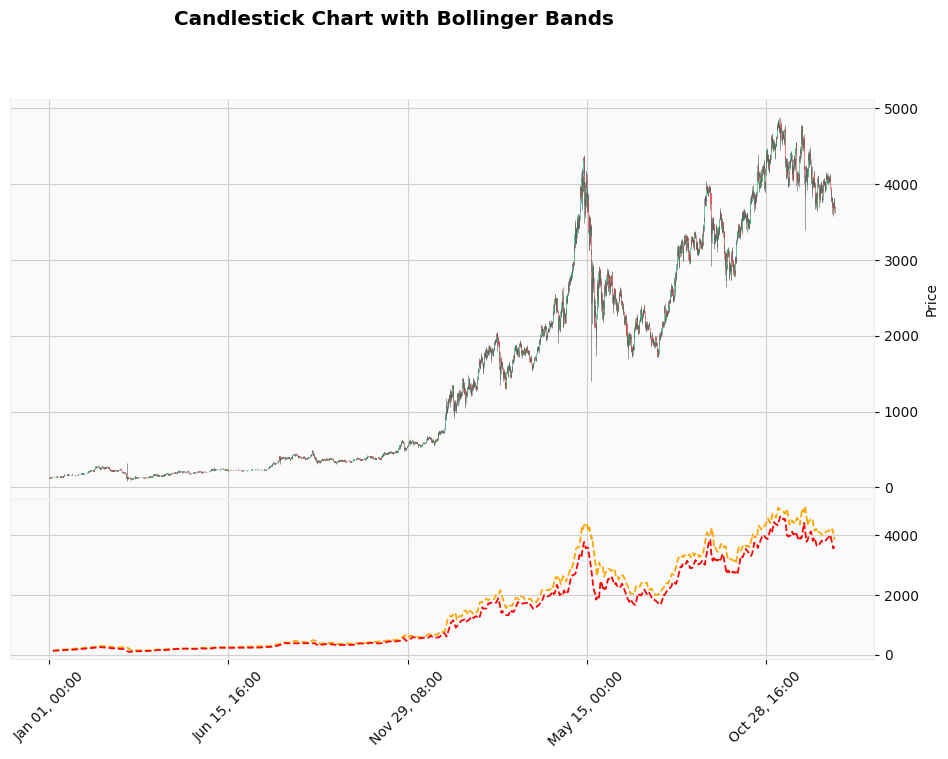

In [ ]:
# For 2020 to 2021
bollinger_plotter = BollingerPlotter(eth_df1)
bollinger_plotter.plot_candlestick_chart()

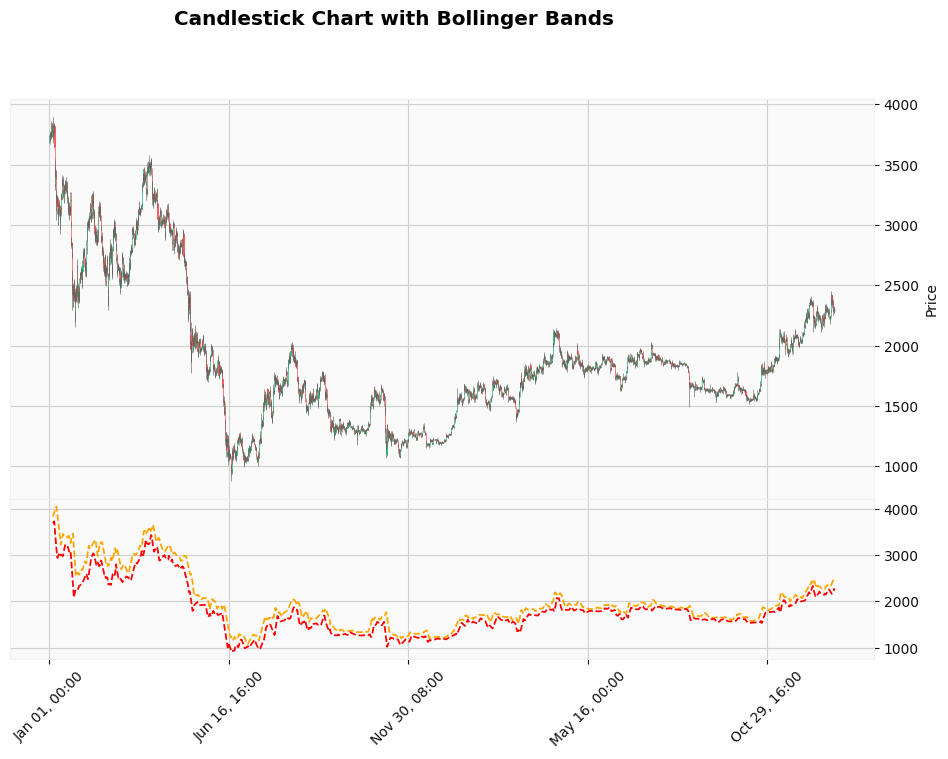

In [ ]:
# For 2022 to 2023
bollinger_plotter = BollingerPlotter(eth_df2)
bollinger_plotter.plot_candlestick_chart()

In [ ]:
eth_df.drop('Year', axis=1)

,datetime,Open,High,Low,Close,Volume
0,2020-01-01 00:00:00,129.12,130.97,128.62,130.09,88391.064
1,2020-01-01 04:00:00,130.10,130.67,130.00,130.17,46813.723
2,2020-01-01 08:00:00,130.15,131.88,129.75,130.64,70366.957
3,2020-01-01 12:00:00,130.63,132.49,130.63,131.97,75684.307
4,2020-01-01 16:00:00,132.00,132.96,131.45,131.79,78724.484
...,...,...,...,...,...,...
8756,2023-12-30 08:00:00,2297.91,2298.98,2269.15,2289.89,438284.239
8757,2023-12-30 12:00:00,2289.89,2318.94,2284.19,2314.41,367229.330
8758,2023-12-30 16:00:00,2314.39,2325.00,2297.40,2301.98,362316.211
8759,2023-12-30 20:00:00,2301.97,2307.58,2273.86,2293.26,241956.541


In [ ]:
eth_df.set_index('datetime', inplace=True)

In [ ]:
eth_df['Daily_Return'] = eth_df['Close'].pct_change()
eth_df['Rolling_Std'] = eth_df['Daily_Return'].rolling(window=20).std()

In [ ]:
avg_daily_return = eth_df['Daily_Return'].mean()
std_dev = eth_df['Daily_Return'].std()

In [ ]:
#filling na values with avg and rolling std with std
eth_df['Daily_Return'].fillna(eth_df['Daily_Return'].mean(), inplace=True)
eth_df['Rolling_Std'].fillna(eth_df['Rolling_Std'].mean(), inplace=True)

In [ ]:
eth_df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Year,0
Daily_Return,0
Rolling_Std,0


In [ ]:
avg_daily_return = eth_df['Daily_Return'].mean()
std_dev = eth_df['Daily_Return'].std()
sharpe_ratio = avg_daily_return / std_dev
print(f"Average Daily Return: {avg_daily_return}")
print(f"Standard Deviation: {std_dev}")
print(f"Sharpe Ratio: {sharpe_ratio}")

Average Daily Return: 0.0004935379252985261
Standard Deviation: 0.01813248377463912
Sharpe Ratio: 0.027218440200057405


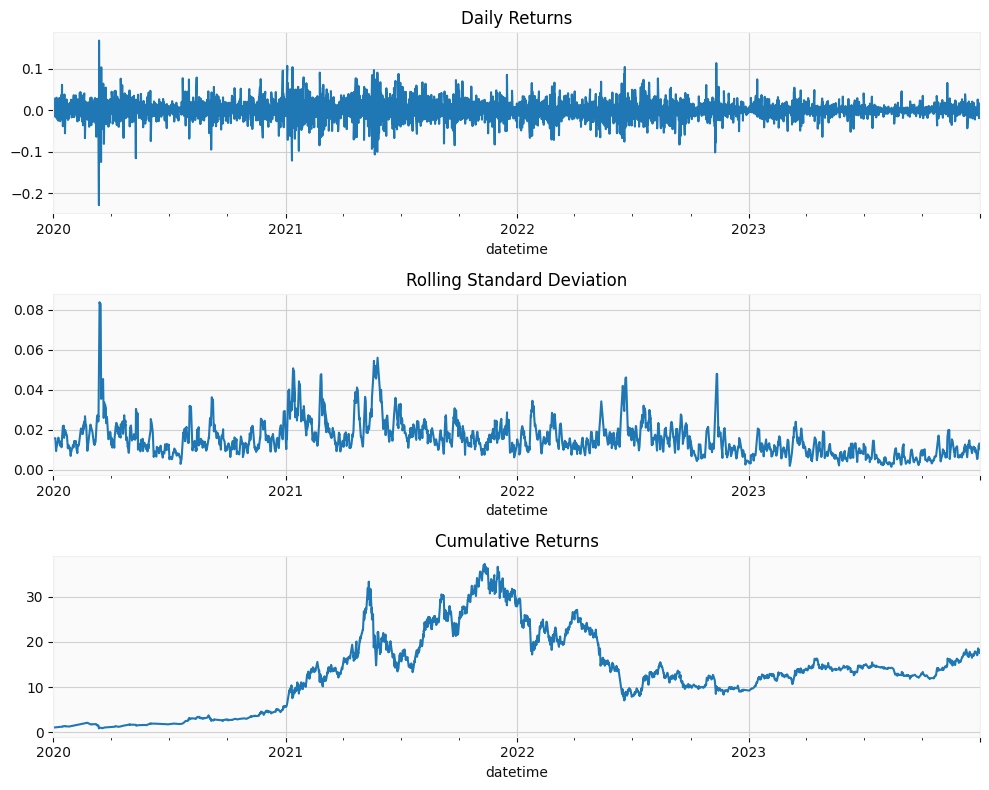

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

eth_df['Daily_Return'].plot(ax=axes[0], title='Daily Returns')

eth_df['Rolling_Std'].plot(ax=axes[1], title='Rolling Standard Deviation')

(eth_df['Daily_Return'] + 1).cumprod().plot(ax=axes[2], title='Cumulative Returns')

plt.tight_layout()
plt.show()

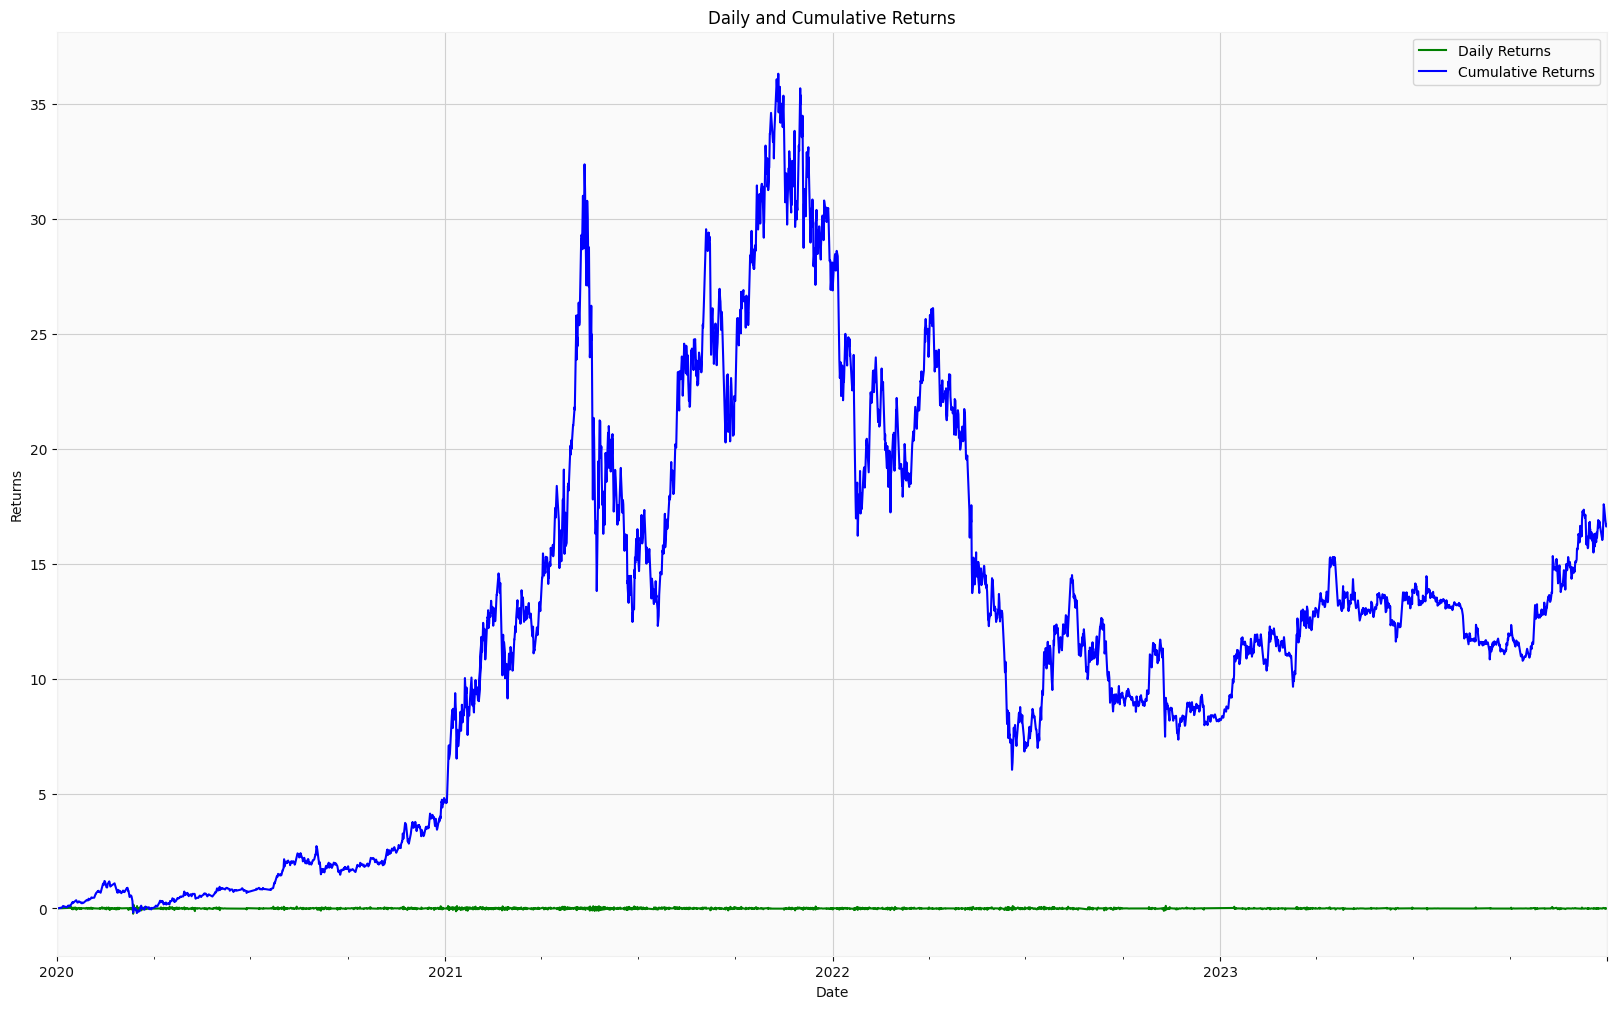

In [ ]:
plt.figure(figsize=(20, 12))

eth_df['Daily_Return'].plot(color='green', label='Daily Returns')
eth_df['Cumulative_Return'] = (eth_df['Daily_Return'] + 1).cumprod()
(eth_df['Cumulative_Return'] - 1).plot(color='blue', label='Cumulative Returns')

plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Daily and Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
eth_df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Year,0
Daily_Return,0
Rolling_Std,0
Cumulative_Return,0


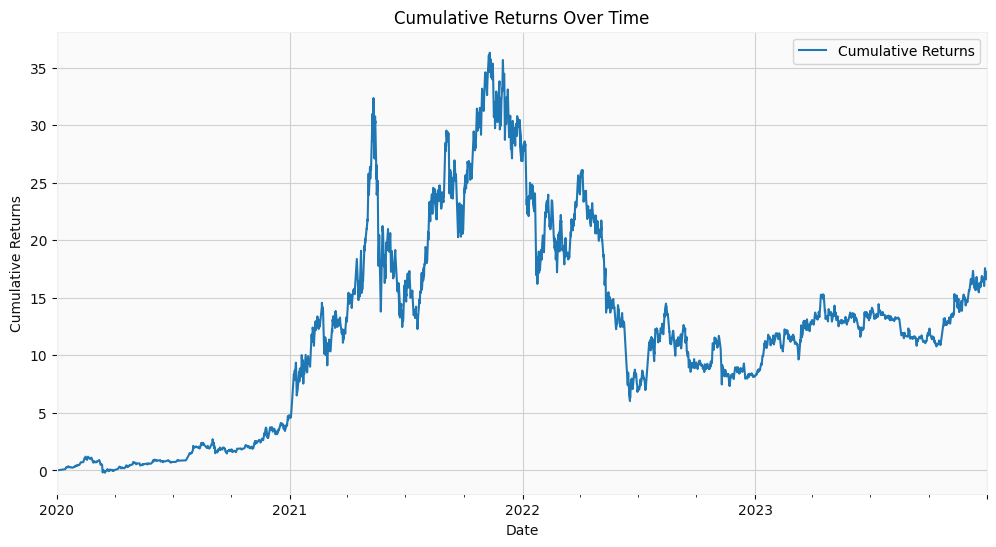

Annualized Return: 18.01%
Annualized Volatility: 34.64%
Sharpe Ratio: 0.5200


In [ ]:
returns = eth_df['Daily_Return']

# Calculate performance metrics
cumulative_returns = (1 + returns).cumprod() - 1
annualized_return = np.mean(returns) * 365
annualized_volatility = np.std(returns) * np.sqrt(365)
sharpe_ratio = annualized_return / annualized_volatility

# Visualize cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot(label='Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

# Display performance metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

In [ ]:
print(eth_df.describe())

              Open         High          Low        Close        Volume  \
count  8761.000000  8761.000000  8761.000000  8761.000000  8.761000e+03   
mean   1713.304873  1734.560063  1690.384902  1713.550486  5.338122e+05   
std    1107.894318  1122.065823  1092.509803  1107.781424  4.998084e+05   
min     103.910000   111.730000    84.230000   103.910000  2.696133e+04   
25%     734.710000   743.730000   725.550000   735.520000  2.264980e+05   
50%    1677.130000  1694.110000  1660.870000  1677.400000  3.853511e+05   
75%    2268.240000  2295.530000  2225.570000  2270.280000  6.671205e+05   
max    4850.950000  4877.540000  4781.000000  4850.950000  9.154170e+06   

              Year  Daily_Return  Rolling_Std  Cumulative_Return  
count  8761.000000   8761.000000  8761.000000        8761.000000  
mean   2021.498117      0.000494     0.015780          13.178539  
std       1.118147      0.018132     0.008959           8.519703  
min    2020.000000     -0.228974     0.001506           

In [ ]:
def clip_outliers(eth_df, column):
    Q1 = eth_df[column].quantile(0.25)
    Q3 = eth_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    eth_df_C=eth_df[(eth_df[column]>=lower_bound) & (eth_df[column]<=upper_bound)]
    return eth_df_C

Open :


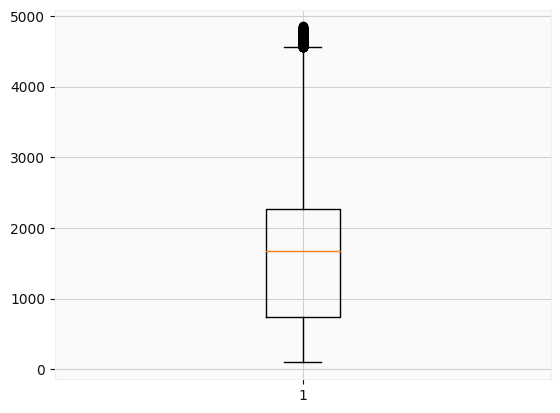

High :


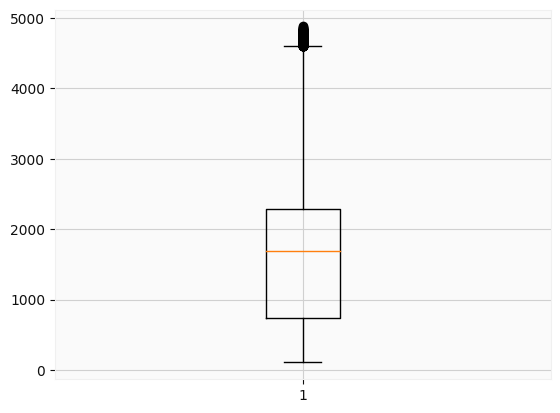

Low :


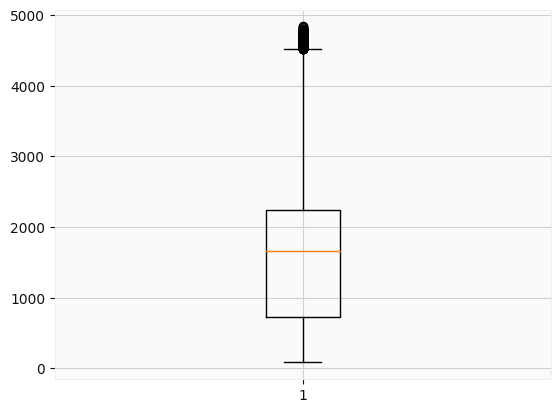

Close :


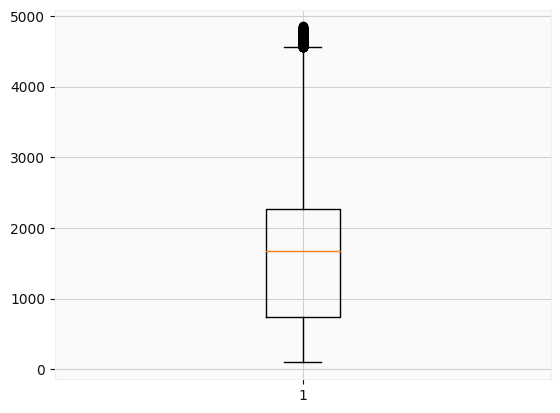

Volume :


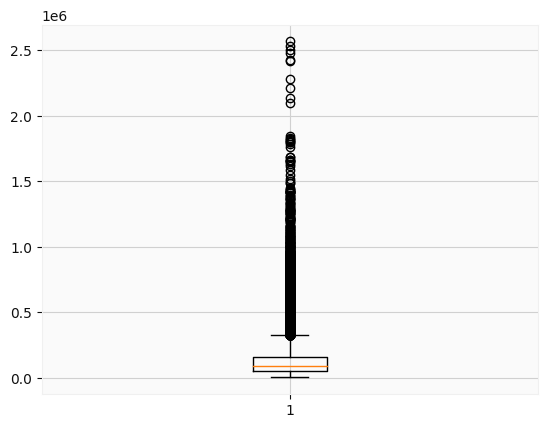

In [ ]:
for i in df.columns:
  print(i,':')
  plt.boxplot(df[i])
  plt.show()


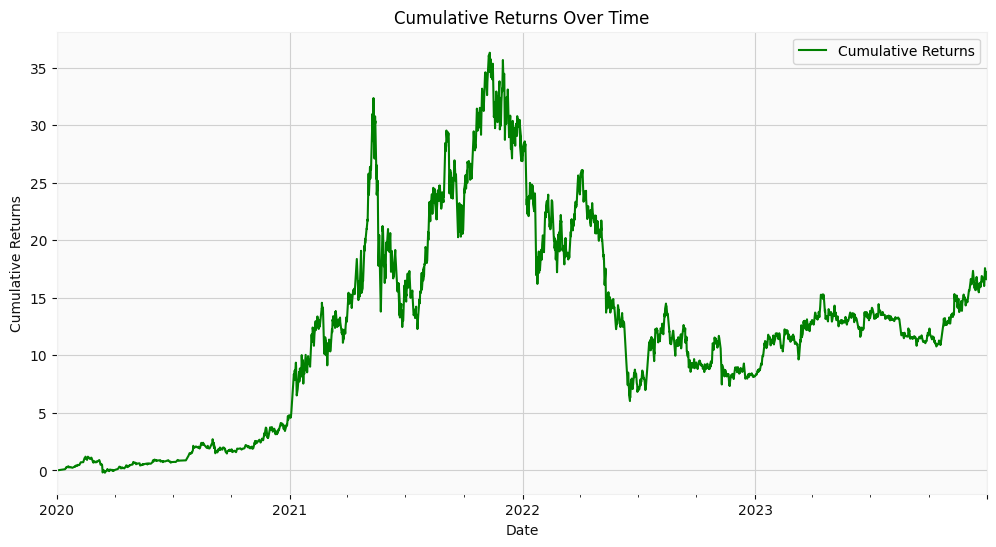

Annualized Return: 18.01%
Annualized Volatility: 34.64%
Sharpe Ratio: 0.5200


In [ ]:
returns = eth_df['Daily_Return']

# Calculate performance metrics
cumulative_returns = (1 + returns).cumprod() - 1
annualized_return = np.mean(returns) * 365  # Assuming 252 trading days in a year
annualized_volatility = np.std(returns) * np.sqrt(365)
sharpe_ratio = annualized_return / annualized_volatility

# Visualize cumulative returns with a different color (e.g., green)
plt.figure(figsize=(12, 6))
cumulative_returns.plot(label='Cumulative Returns', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

# Display performance metrics
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

In [ ]:
!pip install pandas_ta

In [ ]:
import pandas_ta as ta

In [ ]:
def heikin_ashi(df):
    ha_df = df.copy()
    ha_df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    ha_df['HA_Open'] = 0.0
    ha_df['HA_Open'].iloc[0] = df['Open'].iloc[0]

    for i in range(1, len(df)):
        ha_df['HA_Open'].iloc[i] = (ha_df['HA_Open'].iloc[i-1] + ha_df['HA_Close'].iloc[i-1]) / 2

    ha_df['HA_High'] = ha_df[['HA_Open', 'HA_Close', 'High']].max(axis=1)
    ha_df['HA_Low'] = ha_df[['HA_Open', 'HA_Close', 'Low']].min(axis=1)

    return ha_df[['HA_Open', 'HA_High', 'HA_Low', 'HA_Close']]

In [ ]:
def calculate_indicators(df):
    df['ADX_15'] = ta.adx(df['High'], df['Low'], df['Close'], length = 15)['ADX_15']
    df['ADX_25'] = ta.adx(df['High'], df['Low'], df['Close'], length = 25)['ADX_25']
    df['ADX']=ta.adx(df['High'], df['Low'], df['Close'], length = 14)['ADX_14']
    df['RSI'] = ta.rsi(df['Close'], length = 14);
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length = 14)
    return df

In [ ]:
def apply_strategy(df, atr_multiplier=1.5):
    ha_df = heikin_ashi(df)

    # Replace OHLC with Heikin-Ashi values
    df[['Open', 'High', 'Low', 'Close']] = ha_df.rename(columns={
        'HA_Open': 'Open',
        'HA_High': 'High',
        'HA_Low': 'Low',
        'HA_Close': 'Close'
    })

    # Calculate ADX and ATR indicators
    df = calculate_indicators(df)

    # Initialize Signal, Stop Loss, and Take Profit columns
    df['Signal'] = 0
    df['Stop_Loss'] = None
    df['Take_Profit'] = None

    # Track positions (0 = no position, 1 = long, -1 = short)
    position = 0
    stop_loss = 0
    take_profit = 0

    # Track the last non-zero signal to prevent consecutive entries of the same type
    last_non_zero_signal = 0

    # Strategy conditions for labeling signals
    for i in range(2, len(df)):
        atr_value = df['ATR'].iloc[i]

        # Exit conditions for open positions
        if position == 1:  # Long position
            if df['Low'].iloc[i] <= stop_loss:
                df['Signal'].iloc[i] = -1  # Long Exit due to Stop-Loss
                position = 0
                last_non_zero_signal = -1
            elif df['High'].iloc[i] >= take_profit:
                df['Signal'].iloc[i] = -1  # Long Exit due to Take-Profit
                position = 0
                last_non_zero_signal = -1

        elif position == -1:  # Short position
            if df['High'].iloc[i] >= stop_loss:
                df['Signal'].iloc[i] = -2  # Short Exit due to Stop-Loss
                position = 0
                last_non_zero_signal = -2
            elif df['Low'].iloc[i] <= take_profit:
                df['Signal'].iloc[i] = -2  # Short Exit due to Take-Profit
                position = 0
                last_non_zero_signal = -2

        # Long Entry: Only if no position is open and not the same as the last non-zero signal
        if position == 0 and last_non_zero_signal != 1 and df['Close'].iloc[i-1] > df['Open'].iloc[i-1] and df['Close'].iloc[i-2] > df['Open'].iloc[i-2]:
            if df['ADX'].iloc[i] > 25:
                df['Signal'].iloc[i] = 1  # Long Entry
                position = 1
                last_non_zero_signal = 1  # Update last signal

                # Set Stop Loss and Take Profit for long
                entry_price = df['Close'].iloc[i]
                stop_loss = entry_price - atr_multiplier * atr_value
                take_profit = entry_price + atr_multiplier * atr_value

                df['Stop_Loss'].iloc[i] = stop_loss
                df['Take_Profit'].iloc[i] = take_profit

        # Long Exit on red Heikin-Ashi candle
        elif position == 1 and df['Close'].iloc[i] < df['Open'].iloc[i]:
            df['Signal'].iloc[i] = -1  # Long Exit
            position = 0
            last_non_zero_signal = -1

        # Short Entry: Only if no position is open and not the same as the last non-zero signal
        elif position == 0 and last_non_zero_signal != 2 and df['Close'].iloc[i-1] > df['Open'].iloc[i-1] and df['Close'].iloc[i] < df['Open'].iloc[i]:
            if df['ADX'].iloc[i] > 25:
                df['Signal'].iloc[i] = 2  # Short Entry
                position = -1
                last_non_zero_signal = 2  # Update last signal

                # Set Stop Loss and Take Profit for short
                entry_price = df['Close'].iloc[i]
                stop_loss = entry_price + atr_multiplier * atr_value  # Above entry for short
                take_profit = entry_price - atr_multiplier * atr_value  # Below entry for short

                df['Stop_Loss'].iloc[i] = stop_loss
                df['Take_Profit'].iloc[i] = take_profit

        # Short Exit on green Heikin-Ashi candle
        elif position == -1 and df['Close'].iloc[i] > df['Open'].iloc[i]:
            df['Signal'].iloc[i] = -2  # Short Exit
            position = 0
            last_non_zero_signal = -2

    return df


In [ ]:
import numpy as np

def calculate_compound_statistics(df, initial_capital=10000):
    # Ensure the Signal column exists
    if 'Signal' not in df.columns:
        raise ValueError("The DataFrame must contain a 'Signal' column.")

    # Step 1: Create a 'Position' column based on 'Signal'
    df['Position'] = df['Signal'].replace({1: 1, 2: -1, -1: -1, -2: 1}).ffill().fillna(0)

    # Step 2: Calculate Daily Returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Step 3: Calculate Strategy Returns
    df['Strategy_Return'] = df['Daily_Return'] * df['Position'].shift(1)

    # Step 4: Calculate Compound Strategy Returns and Equity Curve
    df['Equity'] = initial_capital * (1 + df['Strategy_Return']).cumprod()
    df['Equity'].iloc[0] = initial_capital  # Set the initial equity value
    df['Cumulative_Returns'] = df['Equity'] / initial_capital - 1  # Compound cumulative returns

    # Step 5: Calculate number of trades
    num_trades = ((df['Signal'] != 0).sum()) / 2  # Each trade involves an entry and an exit

    # Step 6: Calculate final equity and total return
    final_equity = df['Equity'].iloc[-1]
    total_return = (final_equity / initial_capital - 1) * 100  # Total return in percentage

    # Step 7: Calculate max drawdown
    df['Cumulative_High'] = df['Equity'].cummax()
    df['Drawdown'] = df['Equity'] / df['Cumulative_High'] - 1
    max_drawdown = df['Drawdown'][700:].min()

    # Step 8: Calculate Sharpe Ratio
    # Assuming a risk-free rate of 0 for simplicity
    risk_free_rate = 0
    sharpe_ratio = (df['Strategy_Return'].mean() - risk_free_rate) * np.sqrt(365) / df['Strategy_Return'].std()

    # Step 9: Print the statistics
    print(f"Number of Trades: {num_trades:.0f}")
    print(f"Final Equity: ${final_equity:.2f}")
    print(f"Total Return (%): {total_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    return num_trades, final_equity, total_return, sharpe_ratio, max_drawdown


eth=apply_strategy(eth_df)
num_trades, final_equity, total_return, sharpe_ratio, max_drawdown = calculate_compound_statistics(eth)


Number of Trades: 830
Final Equity: $2262770.25
Total Return (%): 22527.70%
Sharpe Ratio: 2.80
Max Drawdown: -9.31%


In [ ]:
eth.head(30)

,Open,High,Low,Close,Volume,Year,Daily_Return,Rolling_Std,Cumulative_Return,ADX_15,...,ATR,Signal,Stop_Loss,Take_Profit,Position,Strategy_Return,Equity,Cumulative_Returns,Cumulative_High,Drawdown
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,129.120000,130.970000,128.620000,129.572031,88391.064,2020,NaN,0.015780,1.000494,NaN,...,NaN,0,None,None,0,NaN,10000.000000,0.000000,10000.000000,0.0
2020-01-01 04:00:00,129.346016,130.670000,129.346016,129.799766,46813.723,2020,0.001758,0.015780,1.001109,NaN,...,NaN,0,None,None,0,0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-01 08:00:00,129.572891,131.880000,129.572891,130.370430,70366.957,2020,0.004396,0.015780,1.004723,NaN,...,NaN,0,None,None,0,0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-01 12:00:00,129.971660,132.490000,129.971660,130.859023,75684.307,2020,0.003748,0.015780,1.014952,NaN,...,NaN,0,None,None,0,0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-01 16:00:00,130.415342,132.960000,130.415342,131.336973,78724.484,2020,0.003652,0.015780,1.013568,NaN,...,NaN,0,None,None,0,0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-01 20:00:00,130.876157,132.250000,129.540000,130.936128,106083.394,2020,-0.003052,0.015780,1.004570,NaN,...,NaN,0,None,None,0,-0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-02 00:00:00,130.906143,131.242969,128.750000,130.326897,91353.234,2020,-0.004653,0.015780,0.992803,NaN,...,NaN,0,None,None,0,-0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-02 04:00:00,130.616520,130.678242,128.670000,129.986840,75147.123,2020,-0.002609,0.015780,0.994264,NaN,...,NaN,0,None,None,0,-0.000000,10000.000000,0.000000,10000.000000,0.0
2020-01-02 08:00:00,130.301680,130.301680,129.170000,129.900013,69341.088,2020,-0.000668,0.015780,0.995802,NaN,...,NaN,0,None,None,0,-0.000000,10000.000000,0.000000,10000.000000,0.0
